In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt
import pathlib
from PIL import Image

In [2]:
# folder = '/home/a/datasets/mnist_png/testing/9/'  # 98.8%, f:98.8%,
# folder = '/home/a/datasets/mnist_png/testing/5/'  # 99.6%, f:99.1%, dir:98.5%
folder = '/home/a/datasets/mnist_png_160x3/testing/5/' # -, 99.2%, dir:97.3%
files = [f for f in os.listdir(folder) if 'png' in f or 'jpg' in f]

In [3]:
# model = load_model('straight_bs200e30_tf25.h5')
# model = load_model('es4_zr.h5')
# model = load_model('es.h5')
# model = load_model('es_func.h5')
model = load_model('es_func_folder.h5')

#### 

In [4]:
def predict(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
    im = img.reshape(1,28,28,1)/255
    return np.argmax(model.predict(im))

In [5]:
def check_reverse(img):
    dark = light = 0
    for x in np.nditer(img):
        if x < 127: dark += 1
        else: light += 1
    if dark > light: return True
    else: return False

In [6]:
def predict_threshold(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
    if check_reverse(img): img = ~img  # ~ for inversed-img
    img = ~cv2.adaptiveThreshold(img,255,
                                 cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY,
#                                      99,10)
                                 19, 10)  # only this 100%
#                                    3,3)
    img = Image.fromarray(img)
    img = img.resize((28,28), Image.ANTIALIAS)
    img = np.array(img)
    arr = img.reshape(1,28,28,1)/255
    return np.argmax(model.predict(arr))

3558.png 3


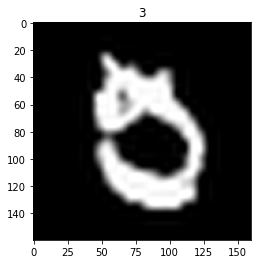

5937.png 3


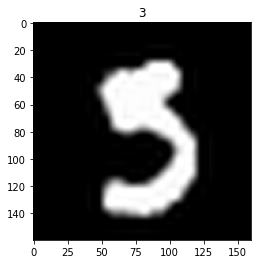

5982.png 3


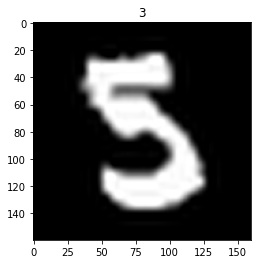

2237.png 8


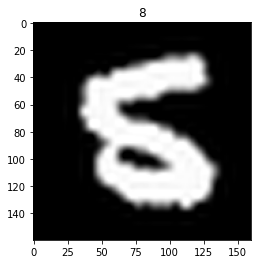

1003.png 8


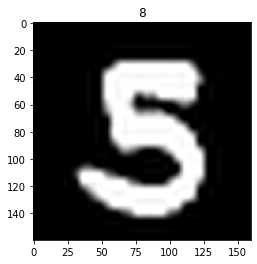

2597.png 3


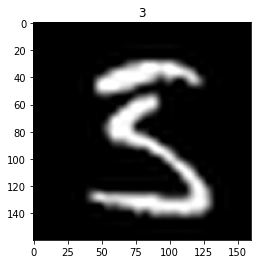

7793.png 8


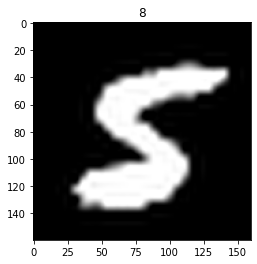

9729.png 6


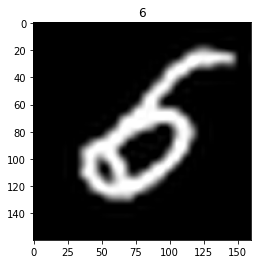

7797.png 8


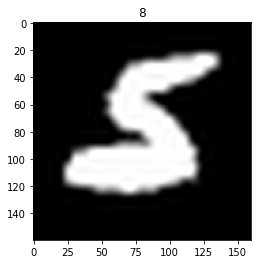

352.png 3


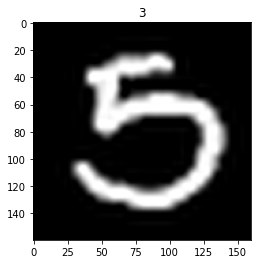

2526.png 8


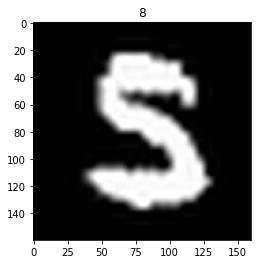

7777.png 8


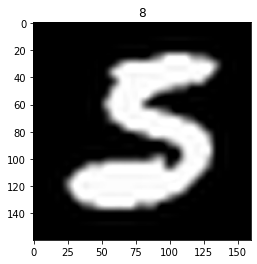

4271.png 3


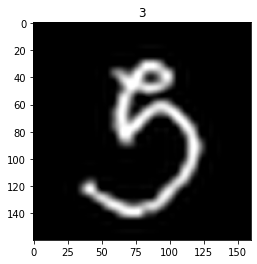

8502.png 3


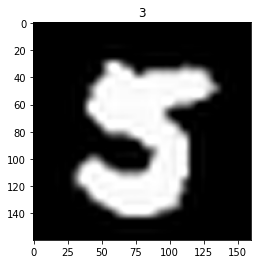

5985.png 8


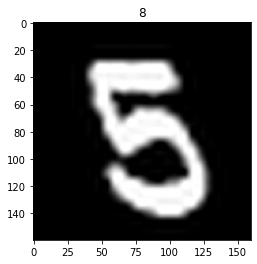

7732.png 8


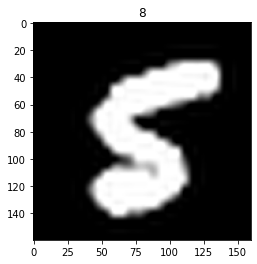

3157.png 3


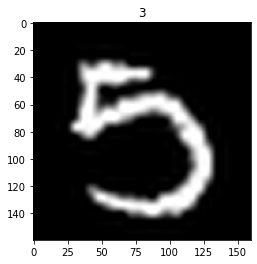

1393.png 3


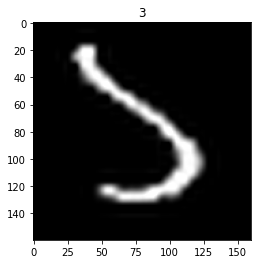

645.png 3


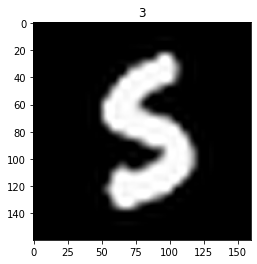

7742.png 8


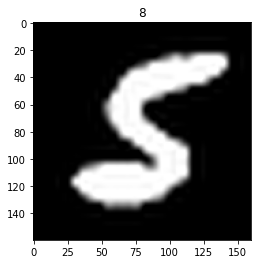

1378.png 6


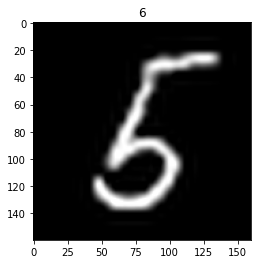

2035.png 3


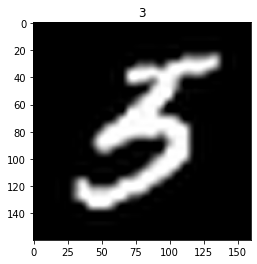

2970.png 3


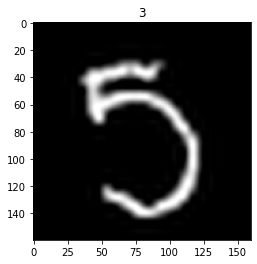

674.png 3


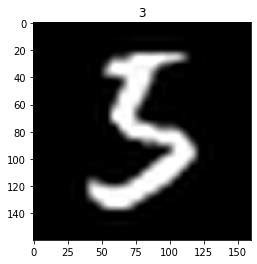

97.30941704035875 %
(array([3, 5, 6, 8]), array([ 13, 868,   2,   9]))


In [7]:
preds = []
count = 0
for i in range(0, len(files)):
#     res = predict(os.path.join(folder,files[i]))  # better predictions than with threshold
    res = predict_threshold(os.path.join(folder,files[i]))
    preds.append(res)
    if pathlib.PurePath(folder).name  == str(res):
        count += 1
    else: 
        print(files[i], res)
        plt.imshow(cv2.imread(os.path.join(folder,files[i])))
        plt.title(res)
        plt.show()
print (count / len(files) * 100, '%')   

results = np.array(preds)
print(np.unique(results, return_counts=True))